In [ ]:
!pip install opencv-python
!pip install scikit-image

In [ ]:
import cv2
print(cv2.__version__)

4.8.0


In [ ]:
from skimage import filters
from skimage.io import imread, imshow, imsave
from skimage.transform import resize
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
import sys
import itertools
import random
import math

In [ ]:
contValues = 0

  Carregar um arquivo

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving download.png to download.png


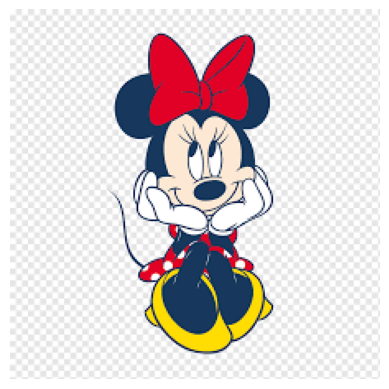

Shape da imagem: (225, 225, 3)
Tipo de dados da imagem: uint8


In [ ]:
from skimage.io import imread
import matplotlib.pyplot as plt

# Substitua 'download.jpg' pelo nome correto do arquivo, se necessário
img = imread('download.png')

plt.imshow(img)
plt.axis('off')  # Para remover os eixos
plt.show()
print(f"Shape da imagem: {img.shape}")
print(f"Tipo de dados da imagem: {img.dtype}")


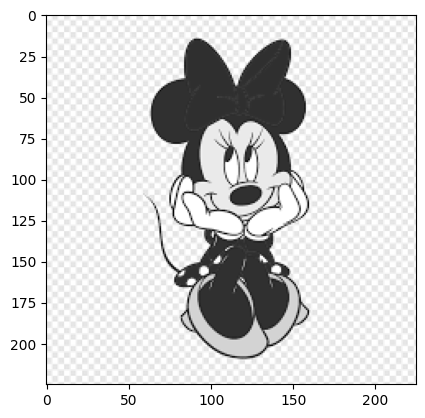

(225, 225)


In [ ]:
# Lendo a imagem
img = imread('download.png')

# Convertendo para níveis de cinza
resized_img = img.copy()
resized_img = rgb2gray(resized_img) * 255
resized_img = resized_img.astype(int)

# Mostrando a imagem
plt.imshow(resized_img, cmap='gray')
plt.show()

# Imprimindo as dimensões da imagem
print(resized_img.shape)

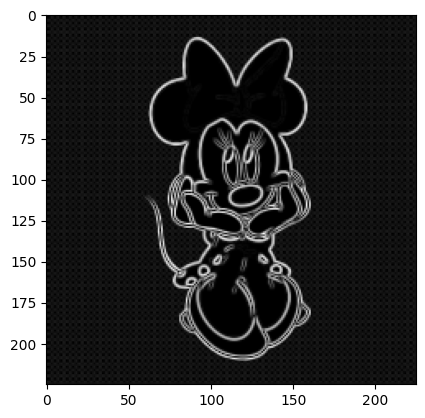

Magnitude do gradiente no ponto (10, 10): 2.1466107833567237e-18


In [ ]:
# Função para calcular a magnitude do gradiente
def magnitude(Gx, Gy):
    return np.sqrt(Gx**2 + Gy**2)

# Calculando os gradientes horizontal e vertical usando o filtro de Sobel
sobel_horizontal = filters.sobel_h(resized_img)
sobel_vertical = filters.sobel_v(resized_img)

# Calculando a magnitude do gradiente
gradient_magnitude = magnitude(sobel_horizontal, sobel_vertical)

# Mostrando a imagem do gradiente
plt.imshow(gradient_magnitude, cmap='gray')
plt.show()

# Imprimindo a magnitude do gradiente em um ponto específico
print("Magnitude do gradiente no ponto (10, 10):", gradient_magnitude[10, 10])


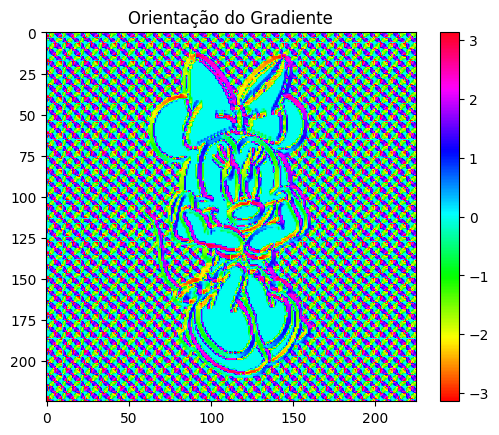

Orientação do gradiente no ponto (10, 10): -2.356194490192345 radianos


In [ ]:
# Função para calcular a orientação do gradiente
def orientacao(Gx, Gy):
    return np.arctan2(Gy, Gx)  # Retorna em radianos

# Calculando os gradientes horizontal e vertical usando o filtro de Sobel
sobel_horizontal = filters.sobel_h(resized_img)
sobel_vertical = filters.sobel_v(resized_img)

# Calculando a orientação do gradiente
orientacoes = orientacao(sobel_horizontal, sobel_vertical)

# Exibindo a orientação do gradiente
plt.imshow(orientacoes, cmap='hsv')  # 'hsv' é um bom mapa de cores para mostrar ângulos
plt.colorbar()
plt.title("Orientação do Gradiente")
plt.show()

# Imprimindo a orientação do gradiente em um ponto específico
print("Orientação do gradiente no ponto (10, 10):", orientacoes[10, 10], "radianos")

O histograma representa a distribuição das magnitudes dos gradientes da imagem em níveis de cinza, e a normalização ajusta os valores do histograma para que a soma do quadrado de seus elementos seja igual a um (ou seja, para que o vetor resultante tenha uma norma L2 igual a um).

In [ ]:
# Normalizando a imagem usando um histograma (a ser criado a partir dos gradientes)
# Definindo a função de normalização
def normalize(hist):
    hist = np.asarray(hist)
    k = (np.sum(hist**2))**(1/2)
    if k != 0:
        hist = hist/k
    return hist.tolist()

# Criando um histograma dos valores da magnitude do gradiente
hist, _ = np.histogram(gradient_magnitude.ravel(), bins=50, range=(0, 255))

# Normalizando o histograma
hist_normalized = normalize(hist)

# Norma L2 do histograma normalizado
norma_l2 = np.linalg.norm(hist_normalized)

plt.tight_layout()
plt.show()

(hist_normalized, norma_l2)


<Figure size 640x480 with 0 Axes>

([1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 1.0)

In [ ]:
def histogramaCel(celula):
    histOri = []
    histMag = []
    for i in range(1, celula.shape[0] - 1):
        for j in range(1, celula.shape[1] - 1):
            Gx = celula[i, j + 1] - celula[i, j - 1]
            Gy = celula[i - 1, j] - celula[i + 1, j]

            mag = magnitude(Gx, Gy)
            ori = orientacao(Gx, Gy) * (180 / np.pi) % 180  # Convertendo para graus

            # Tratamento de NaN não é estritamente necessário aqui, mas mantido por precaução
            histOri.append(0 if math.isnan(ori) else ori)
            histMag.append(0 if math.isnan(mag) else mag)

    # Aqui você pode agregar estes valores em histogramas se necessário
    return histOri, histMag

In [ ]:
def custom_map(input_image, cell_size, block_size):
    result_image = input_image.copy()
    start_row = 0
    end_row = input_image.shape[0] // block_size[0]
    block_count = 1
    for i in range(block_size[0]):
        start_col = 0
        end_col = input_image.shape[1] // block_size[1]
        for j in range(block_size[1]):
            result_image[start_row:end_row, start_col:end_col] = block_count
            block_count += 1
            start_col += (input_image.shape[1] // block_size[1])
            end_col += (input_image.shape[1] // block_size[1])
        start_row += (input_image.shape[0] // block_size[0])
        end_row += (input_image.shape[0] // block_size[0])

    return result_image


In [ ]:
def hist_orig_mag(image, cell_size, block_size):

    cropped_cells = []
    row = 0
    mappings = custom_map(image, cell_size, block_size)

    orientation_blocks = [[]] * (block_size[0] * block_size[1])
    magnitude_blocks = [[]] * (block_size[0] * block_size[1])

    for i in range(int(image.shape[0] / cell_size[0])):
        col = 0
        for j in range(int(image.shape[1] / cell_size[1])):
            cell = image[row:row + cell_size[0], col:col + cell_size[1]]
            cropped_cells.append(cell)

            # Calculating histograms
            orientation_hist, magnitude_hist = histogramaCel(cell)

            # Finding the block ID to which the cell belongs
            block_id = random.choice((mappings[row:row + cell_size[0], col:col + cell_size[1]]).reshape(-1))
            block_id = int(block_id)

            if (i == 0) and (j == 0):
                orientation_blocks[block_id - 1] = orientation_hist
                magnitude_blocks[block_id - 1] = magnitude_hist
            else:
                orientation_blocks[block_id - 1] += orientation_hist
                magnitude_blocks[block_id - 1] += magnitude_hist
            col += cell_size[1]
        row += cell_size[0]

    print('Pixels da Imagem: {}'.format(image.shape[0] * image.shape[1]))
    return cropped_cells, orientation_blocks, magnitude_blocks


In [ ]:
def run_histograms(array, cell_size, block_size):
    rows = array.shape[0]
    cols = array.shape[1]

    while not ((rows % cell_size[0] == 0) and ((rows / cell_size[0]) % block_size[0] == 0)):
        rows += 1

    while not ((cols % cell_size[1] == 0) and ((cols / cell_size[1]) % block_size[1] == 0)):
        cols += 1

    new_array = np.ones([rows, cols])
    new_array[0:array.shape[0], 0:array.shape[1]] = array

    cropped_cells, orientation_blocks, magnitude_blocks = hist_orig_mag(new_array, cell_size, block_size)
    array_cropped_cells = np.asarray(cropped_cells)

    hog_final_orientations = []
    hog_final_magnitudes = []
    merged_orientations = []
    merged_magnitudes = []

    for i in range(len(orientation_blocks)):
        hog_final_orientations.append(normalize(orientation_blocks[i]))
        merged_orientations = list(itertools.chain(*hog_final_orientations))
        hog_final_magnitudes.append(normalize(magnitude_blocks[i]))
        merged_magnitudes = list(itertools.chain(*hog_final_magnitudes))

    global contValues

    print('Tamanho final do histograma (blocos) Orientações: {}'.format(len(hog_final_orientations)))
    print('Tamanho final do histograma (blocos) Magnitudes: {}'.format(len(hog_final_magnitudes)))
    print('Tamanho das Orientações Mescladas (Orientações Finais): {}'.format(len(merged_orientations)))
    print('Tamanho das Magnitudes Mescladas (Magnitudes Finais): {}'.format(len(merged_magnitudes)))

    return merged_orientations, merged_magnitudes


In [ ]:
from collections import Counter

print(resized_img.shape)

hist_final_orientation, hist_final_magnitude = run_histograms(orientacoes, [8,8], [2,2])

histogram1 = []
histogram1.append(list(Counter(hist_final_orientation).values()))
histogram1.append(list(Counter(hist_final_orientation).keys()))

histogram2 = []
histogram2.append(list(Counter(hist_final_orientation).values()))
histogram2.append(list(Counter(hist_final_orientation).keys()))

print('Tamanho dos histogramas finais: {} e {}'.format(len(histogram1[0]), len(histogram2[0])))


(225, 225)
Pixels da Imagem: 57600
Tamanho final do histograma (blocos) Orientações: 4
Tamanho final do histograma (blocos) Magnitudes: 4
Tamanho das Orientações Mescladas (Orientações Finais): 81000
Tamanho das Magnitudes Mescladas (Magnitudes Finais): 81000
Tamanho dos histogramas finais: 12004 e 12004
